# Data Pre-Processing

## Doctor Fees Dataset

In [2]:
doctor_training_data = pd.read_excel('./data/doctors_fees_training_data.xlsx') # import xlsx file

In [3]:
doctor_training_data.tail() #check data

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100
5960,"BDS, MDS - Orthodontics",17 years experience,100%,"Pitampura, Delhi",Dentist,Acrylic Partial Denture Crowns and Bridges Fix...,200


In [5]:
#merged = pd.concat([doctor_training_data, dummy_place, dummy_qualification, dummy_profile], axis="columns") #merge new columns
final = doctor_training_data

In [6]:
#final = merged.drop(['Qualification', 'Place', 'Miscellaneous_Info', 'Profile'], axis="columns") #drop old our new columns

In [7]:
#Drop 1 dummy column of each 1hotencoded to avoid the dummy trap
#final = final.drop(['Old City, Hyderabad', 'BSc - Zoology, BAMS', 'ENT Specialist'], axis="columns")

In [8]:
experience = final['Experience'].apply(lambda x: int(x.split('years experience')[0])) # Parse out the number from the experience

In [9]:
final = final.drop(['Experience'], axis="columns") #drop experience column
final = pd.concat([final, experience], axis="columns") #concat our parsed experience column


In [10]:
final = final.dropna() #Drop NaN rows - these will probably cause the model to throw an error

In [11]:
rating = final['Rating'].apply(lambda x: x.split('%')[0]) #process the rating column to remove the %

In [12]:
final = final.drop('Rating', axis="columns") #drop rating column

In [13]:
final = pd.concat([final, rating], axis="columns") #concat our parsed rating column

In [14]:
final = final.drop('Miscellaneous_Info', axis="columns") #drop this feedback column - hard to process it
final = final.sort_values(by=['Experience'])

In [15]:
final

,Qualification,Place,Profile,Fees,Experience,Rating
2091,151,114,5,250,0,95
2773,53,99,3,100,0,96
4012,53,165,3,500,0,96
3344,327,275,4,100,0,81
2744,6,280,3,200,2,100
...,...,...,...,...,...,...
3942,160,476,2,100,51,88
5422,1309,671,2,550,52,58
1860,15,563,2,100,53,93
4212,16,103,4,200,56,76


In [4]:
#dummy_place = pd.get_dummies(doctor_training_data.Place) #1 hot encoding
#dummy_qualification = pd.get_dummies(doctor_training_data.Qualification) #1 hot encoding
#dummy_profile = pd.get_dummies(doctor_training_data.Profile) #1 hot encoding

doctor_training_data['Place'] = pd.factorize(doctor_training_data['Place'])[0]
doctor_training_data['Qualification'] = pd.factorize(doctor_training_data['Qualification'])[0]
doctor_training_data['Profile'] = pd.factorize(doctor_training_data['Profile'])[0]

In [17]:
#x = final.drop('Fees', axis="columns") #drop Fees - this is the column we will be predicting
x = final['Experience'].values.reshape(-1,1)

In [18]:
y = final['Fees'].values.reshape(-1,1) #column we will be predicting

In [31]:
doctor_test_data = pd.read_excel('./data/doctors_fees_test_data.xlsx') # import xlsx file

In [32]:
# need to process test data similar to train data so we can predict
#dummy_test_place = pd.get_dummies(doctor_test_data.Place) #1 hot encoding
#dummy_test_qualification = pd.get_dummies(doctor_test_data.Qualification) #1 hot encoding
#dummy_test_profile = pd.get_dummies(doctor_test_data.Profile) #1 hot encoding

doctor_test_data['Place'] = pd.factorize(doctor_test_data['Place'])[0]
doctor_test_data['Qualification'] = pd.factorize(doctor_test_data['Qualification'])[0]
doctor_test_data['Profile'] = pd.factorize(doctor_test_data['Profile'])[0]
final_test = doctor_test_data

In [33]:
#merged_test = pd.concat([doctor_test_data, dummy_test_place, dummy_test_qualification, dummy_test_profile], axis="columns") #merge new columns
#final_test = merged_test.drop(['Qualification', 'Place', 'Miscellaneous_Info', 'Profile'], axis="columns") #drop old our new columns

In [34]:
experience_test = final_test['Experience'].apply(lambda x: int(x.split('years experience')[0])) # Parse out the number from the experience
final_test = final_test.drop(['Experience'], axis="columns") #drop experience column
final_test = pd.concat([final_test, experience_test], axis="columns") #concat our parsed experience column

In [35]:
final_test = final_test.dropna()

In [36]:
final_test = final_test.drop(['Miscellaneous_Info'], axis="columns")

In [37]:
rating_test = final_test['Rating'].apply(lambda x: x.split('%')[0]) #process the rating column to remove the %
final_test = final_test.drop('Rating', axis="columns") #drop rating column
final_test = pd.concat([final_test, rating_test], axis="columns") #concat our parsed rating column

## Tipping Dataset

In [493]:
tipping_data = pd.read_csv('./data/tips.csv')

tipping_data_y = tipping_data['tip']
tipping_data_x = tipping_data.drop(['tip'], axis="columns")

In [494]:
#split into test and train data
tip_train_x, tip_test_x, tip_train_y, tip_test_y = train_test_split(tipping_data_x, tipping_data_y, test_size=0.2, shuffle=False)


In [495]:
# parse columns, preprocess data
train_sex = pd.factorize(tip_train_x['sex'])[0]
train_smoker = pd.factorize(tip_train_x['smoker'])[0]
train_day = pd.factorize(tip_train_x['day'])[0]
train_time = pd.factorize(tip_train_x['time'])[0]

test_sex = pd.factorize(tip_test_x['sex'])[0]
test_smoker = pd.factorize(tip_test_x['smoker'])[0]
test_day = pd.factorize(tip_test_x['day'])[0]
test_time = pd.factorize(tip_test_x['time'])[0]


# Training
data = {
    'sex': train_sex,
    'smoker': train_smoker,
    'day': train_day,
    'time': train_time
}
df_train = pd.DataFrame(data)

# Testing
data_test = {
    'sex': test_sex,
    'smoker': test_smoker,
    'day': test_day,
    'time': test_time
}
indices = np.arange(len(tip_train_x), len(tip_train_x) + len(tip_test_x)) # have to be careful for indices 
df_test = pd.DataFrame(data_test,index=indices)

In [496]:
tip_train_x = tip_train_x.drop(['sex', 'smoker', 'day', 'time'], axis="columns")
tip_test_x = tip_test_x.drop(['sex', 'smoker','day', 'time'], axis="columns")

In [497]:
tip_train_x = pd.concat([tip_train_x, df_train], axis="columns", ignore_index=True)
tip_train_x.columns = ['total_bill', 'size', 'sex', 'smoker', 'day', 'time'] # rename columns

tip_test_x = pd.concat([tip_test_x, df_test], axis="columns", )
tip_test_x.columns = ['total_bill', 'size', 'sex', 'smoker', 'day', 'time'] # rename columns

In [498]:
tip_test_x

,total_bill,size,sex,smoker,day,time
195,7.56,2,0,0,0,0
196,10.34,2,0,1,0,0
197,43.11,4,1,1,0,0
198,13.00,2,1,1,0,0
199,13.51,2,0,1,0,0
200,18.71,3,0,1,0,0
201,12.74,2,1,1,0,0
202,13.00,2,1,1,0,0
203,16.40,2,1,1,0,0
204,20.53,4,0,1,0,0


# Imports

In [179]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model 
from sklearn.model_selection import train_test_split # Train / Test splitting
from matplotlib import pyplot as plt # Python plotting lib
from sklearn.linear_model import LinearRegression # Linear Regression
from sklearn.metrics import mean_squared_error, r2_score # Metrics for evaluating the models
from sklearn.preprocessing import PolynomialFeatures # Polynomial Features for Linear Regression
from sklearn.tree import DecisionTreeRegressor # Decision Tree Regressor
from sklearn.linear_model import Ridge # Ridge Regressor
from sklearn.linear_model import Lasso # Lasso Regressor

# Linear Regression

In [528]:
model = LinearRegression() #Linear Regression model

In [529]:
polynomial_features = PolynomialFeatures(degree=5)
x_poly = polynomial_features.fit_transform(x)

In [530]:
model.fit(tip_train_x['total_bill'].values.reshape(-1,1), tip_train_y) # x,y
#model.fit(x_poly, y)
#y_poly_pred = model.predict(x_poly)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [532]:
# try to predict the final_test Fees
#test_x = final_test['Experience'].values.reshape(-1,1)
#test_y = model.predict(test_x)
predicted_y = model.predict(tip_test_x['total_bill'].values.reshape(-1,1))
# model.score(test_x, test_y)


pandas.core.series.Series

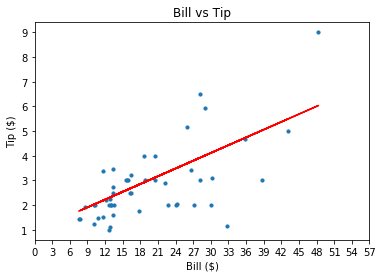

In [533]:
#train_x = np.array(x['Experience'])
#train_y = np.array(y)
#predicted_y = np.array(test_y)


plt.scatter(tip_test_x['total_bill'], tip_test_y, s=10)
plt.plot(tip_test_x['total_bill'], predicted_y, color="red")
plt.title('Bill vs Tip')
plt.xlabel('Bill ($)')
plt.xticks(np.arange(0, 60, 3))
plt.ylabel('Tip ($)')
plt.show()

In [534]:
test_set_rmse = (np.sqrt(mean_squared_error(tip_test_y, predicted_y))) #RMSE
test_set_r2 = r2_score(tip_test_y, predicted_y) #R2

In [535]:
test_set_rmse

1.1513504263650032

In [536]:
test_set_r2

0.4097138240215997

In [537]:
model.score(tip_test_y, predicted_y)

ValueError: Expected 2D array, got 1D array instead:
array=[1.44 2.   5.   2.   2.   4.   2.01 2.   2.5  4.   3.23 3.41 3.   2.03
 2.23 2.   5.16 9.   2.5  6.5  1.1  3.   1.5  1.44 3.09 2.2  3.48 1.92
 3.   1.58 2.5  2.   3.   2.72 2.88 2.   3.   3.39 1.47 3.   1.25 1.
 1.17 4.67 5.92 2.   2.   1.75 3.  ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

# Regression Tree

In [553]:
tree = DecisionTreeRegressor(criterion='mae')

In [554]:
final_features = final.drop(['Fees'], axis="columns")
tree.fit(tip_train_x, tip_train_y)

DecisionTreeRegressor(criterion='mae', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [555]:
predict_y = tree.predict(tip_test_x)

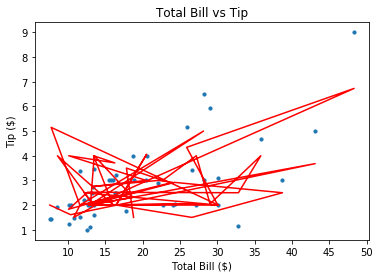

In [569]:
plt.scatter(tip_test_x['total_bill'].values.reshape(-1,1) ,tip_test_y, s=10)
plt.plot(tip_test_x['total_bill'].values.reshape(-1,1), predict_y, color="red")
plt.title('Total Bill vs Tip')
plt.xlabel('Total Bill ($)')
# plt.xticks(np.arange(0, 60, 3))
plt.ylabel('Tip ($)')
plt.show()

In [561]:
test_set_rmse = (np.sqrt(mean_squared_error(tip_test_y, predict_y))) #RMSE
test_set_r2 = r2_score(tip_test_y, predict_y) #R2

In [562]:
test_set_rmse

1.5270406219955281

In [563]:
test_set_r2

-0.03836189104971299

In [567]:
tree.score(tip_test_x, predict_y)

1.0

# Ridge Regression

In [573]:
ridge = Ridge(alpha=50, solver='sparse_cg')


In [574]:
ridge.fit(tip_train_x, tip_train_y)

Ridge(alpha=50, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='sparse_cg', tol=0.001)

In [575]:
predict_y = ridge.predict(tip_test_x)

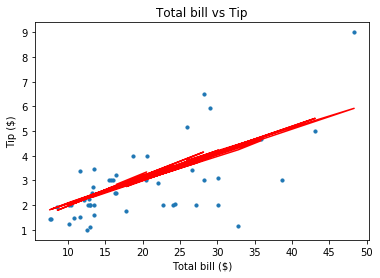

In [576]:
plt.scatter(tip_test_x['total_bill'].values.reshape(-1,1), tip_test_y, s=10)
plt.plot(tip_test_x['total_bill'], predict_y, color="red")
plt.title('Total bill vs Tip')
plt.xlabel('Total bill ($)')
# plt.xticks(np.arange(0, 60, 3))
plt.ylabel('Tip ($)')
plt.show()

In [577]:
test_set_rmse = (np.sqrt(mean_squared_error(tip_test_y, predict_y))) #RMSE
test_set_r2 = r2_score(tip_test_y, predict_y) #R2


In [578]:
test_set_rmse

1.144949345968069

In [579]:
test_set_r2

0.4162591220317269

In [582]:
ridge.score(tip_test_x, predict_y)

1.0

# Lasso Regression

In [217]:
lasso = Lasso(alpha=1, normalize=False, selection="cyclic")

In [218]:
lasso.fit(final_features,y)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [219]:
predict_y = lasso.predict(tip_test_x)

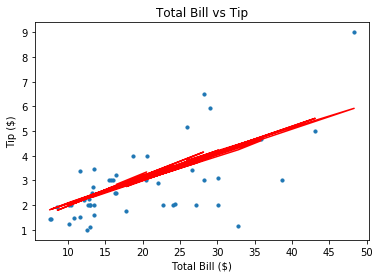

In [584]:
plt.scatter(tip_test_x['total_bill'],tip_test_y, s=10)
plt.plot(tip_test_x['total_bill'], predict_y, color="red")
plt.title('Total Bill vs Tip')
plt.xlabel('Total Bill ($)')
# plt.xticks(np.arange(0, 60, 3))
plt.ylabel('Tip ($)')
plt.show()


In [585]:
test_set_rmse = (np.sqrt(mean_squared_error(tip_test_y, predict_y))) #RMSE
test_set_r2 = r2_score(tip_test_y, predict_y) #R2


In [586]:
test_set_rmse

1.144949345968069

In [587]:
test_set_r2

0.4162591220317269

In [588]:
lasso.score(final_features,y )

0.047208193288060585